In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_cm_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        48.8701 (44.6184, 54.5656) (44.2019, 54.0146)  9.8127 (Jnode 202)\n',
 't_n104        31.5442 (28.3142, 34.1363) (28.2793, 34.0891)  5.8098 (Jnode 201)\n',
 't_n105        30.2507 (27.1291, 32.7324) (27.1268, 32.7202)  5.5933 (Jnode 200)\n',
 't_n106        27.3325 (24.4973, 29.6981) (24.6429, 29.8089)  5.1660 (Jnode 199)\n',
 't_n107        26.4342 (23.6844, 28.7528) (23.8048, 28.8453)  5.0405 (Jnode 198)\n',
 't_n108        24.7751 (22.2262, 27.0131) (22.2621, 27.0382)  4.7760 (Jnode 197)\n',
 't_n109        12.4641 (11.2757, 14.2572) (11.1221, 14.0115)  2.8894 (Jnode 196)\n',
 't_n110        12.3377 (11.1659, 14.1162) (11.0386, 13.8956)  2.8570 (Jnode 195)\n',
 't_n111        11.9082 (10.7972, 13.6243) (10.6441, 13.3895)  2.7454 (Jnode 194)\n',
 't_n112        11.3556 (10.3097, 12.9969) (10.1939, 12.7976)  2.6037 (Jnode 193)\n',
 't_n113        10.8332 ( 9.8496, 12.3993) ( 9.7597, 12.2387)  2.4790 (Jnode 192)\n',
 't_n114         7.2635 ( 6.4734,  8.3626) ( 6.4215,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    print(line)
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    # if line[3].startswith('('):
    #     lower_ci_iqtree.append(float(line[3][1:-1].strip()))
    # else:
    #     lower_ci_iqtree.append(float(line[3][1:-1].strip()))
    # print(line[4])
    # if line[4].startswith('('):
    #     
    #     upper_ci_iqtree.append(float(line[4][1:-1].strip()))
    # else:
    #     upper_ci_iqtree.append(float(line[4][:-1].strip()))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

['t_n103', '48.8701', '(44.6184,', '54.5656)', '(44.2019,', '54.0146)', '9.8127', '(Jnode', '202)']
['t_n104', '31.5442', '(28.3142,', '34.1363)', '(28.2793,', '34.0891)', '5.8098', '(Jnode', '201)']
['t_n105', '30.2507', '(27.1291,', '32.7324)', '(27.1268,', '32.7202)', '5.5933', '(Jnode', '200)']
['t_n106', '27.3325', '(24.4973,', '29.6981)', '(24.6429,', '29.8089)', '5.1660', '(Jnode', '199)']
['t_n107', '26.4342', '(23.6844,', '28.7528)', '(23.8048,', '28.8453)', '5.0405', '(Jnode', '198)']
['t_n108', '24.7751', '(22.2262,', '27.0131)', '(22.2621,', '27.0382)', '4.7760', '(Jnode', '197)']
['t_n109', '12.4641', '(11.2757,', '14.2572)', '(11.1221,', '14.0115)', '2.8894', '(Jnode', '196)']
['t_n110', '12.3377', '(11.1659,', '14.1162)', '(11.0386,', '13.8956)', '2.8570', '(Jnode', '195)']
['t_n111', '11.9082', '(10.7972,', '13.6243)', '(10.6441,', '13.3895)', '2.7454', '(Jnode', '194)']
['t_n112', '11.3556', '(10.3097,', '12.9969)', '(10.1939,', '12.7976)', '2.6037', '(Jnode', '193)']


In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[48.8701,
 31.5442,
 30.2507,
 27.3325,
 26.4342,
 24.7751,
 12.4641,
 12.3377,
 11.9082,
 11.3556,
 10.8332,
 7.2635,
 4.3414,
 2.5508,
 2.2075,
 8.3283,
 6.9882,
 11.3986,
 7.0467,
 10.8995,
 8.6578,
 7.0256,
 6.0999,
 10.6228,
 9.9179,
 2.9818,
 11.7466,
 10.5252,
 8.182,
 6.5356,
 7.2691,
 6.5212,
 5.3757,
 5.53,
 22.9742,
 18.7755,
 25.1513,
 23.0298,
 21.2991,
 17.8123,
 9.9743,
 17.4398,
 15.1091,
 13.3794,
 11.2423,
 20.9444,
 19.2456,
 5.7181,
 2.7061,
 28.148,
 26.3878,
 23.6198,
 23.0901,
 24.8786,
 17.104,
 20.9653,
 16.5827,
 30.6342,
 28.7649,
 26.1739,
 24.4572,
 21.0293,
 14.4406,
 18.496,
 25.4563,
 9.2961,
 25.593,
 37.1826,
 35.8532,
 34.6188,
 32.8235,
 30.2632,
 28.8042,
 27.5047,
 26.0346,
 23.1091,
 19.9576,
 16.6099,
 23.3084,
 21.8852,
 17.5606,
 19.3251,
 25.7752,
 23.6273,
 21.5045,
 18.5203,
 12.8293,
 24.0105,
 21.5536,
 18.7441,
 28.5003,
 26.8889,
 24.866,
 21.7954,
 15.5196,
 25.0217,
 17.6648,
 13.9112,
 5.5753,
 36.196,
 31.1718]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cm_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
#     
# # for line in var_data1:
# #     line = line.strip().split()
# #     # node_name.append(line[0])
# #     posterior_mean_var_baseml.append(float(line[1]))
# #     lower_ci_var_baseml.append(float(line[3][:-1]))
# #     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # # Example data
# # # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# # posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# # 
# # # Credible intervals for MCMCtree
# # lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# # upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# # 
# # # Credible intervals for McmcDate
# # lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]
# 
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Cherry only calibrations]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_co.png')

In [11]:
posterior_mean_baseml

[48.7087,
 31.7484,
 30.1242,
 27.1066,
 26.0848,
 23.8496,
 12.8507,
 12.6697,
 11.9996,
 11.3101,
 10.6009,
 7.1093,
 4.3468,
 2.5548,
 2.1749,
 8.0715,
 6.6163,
 11.3017,
 6.928,
 10.6832,
 8.3919,
 6.6707,
 6.1329,
 10.6084,
 9.7939,
 3.2024,
 11.9266,
 10.5593,
 8.1686,
 6.476,
 7.2916,
 6.4036,
 5.1667,
 5.9048,
 22.0288,
 18.1475,
 24.5567,
 22.2315,
 20.2287,
 16.6812,
 9.5309,
 16.4733,
 14.0075,
 12.1018,
 9.9942,
 20.1787,
 18.2757,
 5.9461,
 2.7873,
 27.222,
 24.8177,
 21.5486,
 21.1171,
 23.5896,
 16.0006,
 19.4487,
 14.8455,
 30.5976,
 28.4147,
 25.363,
 23.3337,
 19.8778,
 14.0983,
 17.1425,
 24.7805,
 9.8438,
 25.1239,
 38.4648,
 36.6266,
 34.945,
 32.8472,
 29.6791,
 27.8627,
 26.263,
 24.2859,
 20.9568,
 17.639,
 14.5292,
 21.4836,
 19.8452,
 15.552,
 16.9661,
 24.1904,
 21.708,
 19.3858,
 16.3708,
 11.4577,
 21.9784,
 19.4373,
 16.6354,
 27.2674,
 24.9886,
 22.6549,
 19.2918,
 13.3264,
 23.422,
 17.3514,
 13.4212,
 5.5687,
 37.0652,
 31.6674]

In [12]:
posterior_mean_iqtree

[48.8701,
 31.5442,
 30.2507,
 27.3325,
 26.4342,
 24.7751,
 12.4641,
 12.3377,
 11.9082,
 11.3556,
 10.8332,
 7.2635,
 4.3414,
 2.5508,
 2.2075,
 8.3283,
 6.9882,
 11.3986,
 7.0467,
 10.8995,
 8.6578,
 7.0256,
 6.0999,
 10.6228,
 9.9179,
 2.9818,
 11.7466,
 10.5252,
 8.182,
 6.5356,
 7.2691,
 6.5212,
 5.3757,
 5.53,
 22.9742,
 18.7755,
 25.1513,
 23.0298,
 21.2991,
 17.8123,
 9.9743,
 17.4398,
 15.1091,
 13.3794,
 11.2423,
 20.9444,
 19.2456,
 5.7181,
 2.7061,
 28.148,
 26.3878,
 23.6198,
 23.0901,
 24.8786,
 17.104,
 20.9653,
 16.5827,
 30.6342,
 28.7649,
 26.1739,
 24.4572,
 21.0293,
 14.4406,
 18.496,
 25.4563,
 9.2961,
 25.593,
 37.1826,
 35.8532,
 34.6188,
 32.8235,
 30.2632,
 28.8042,
 27.5047,
 26.0346,
 23.1091,
 19.9576,
 16.6099,
 23.3084,
 21.8852,
 17.5606,
 19.3251,
 25.7752,
 23.6273,
 21.5045,
 18.5203,
 12.8293,
 24.0105,
 21.5536,
 18.7441,
 28.5003,
 26.8889,
 24.866,
 21.7954,
 15.5196,
 25.0217,
 17.6648,
 13.9112,
 5.5753,
 36.196,
 31.1718]

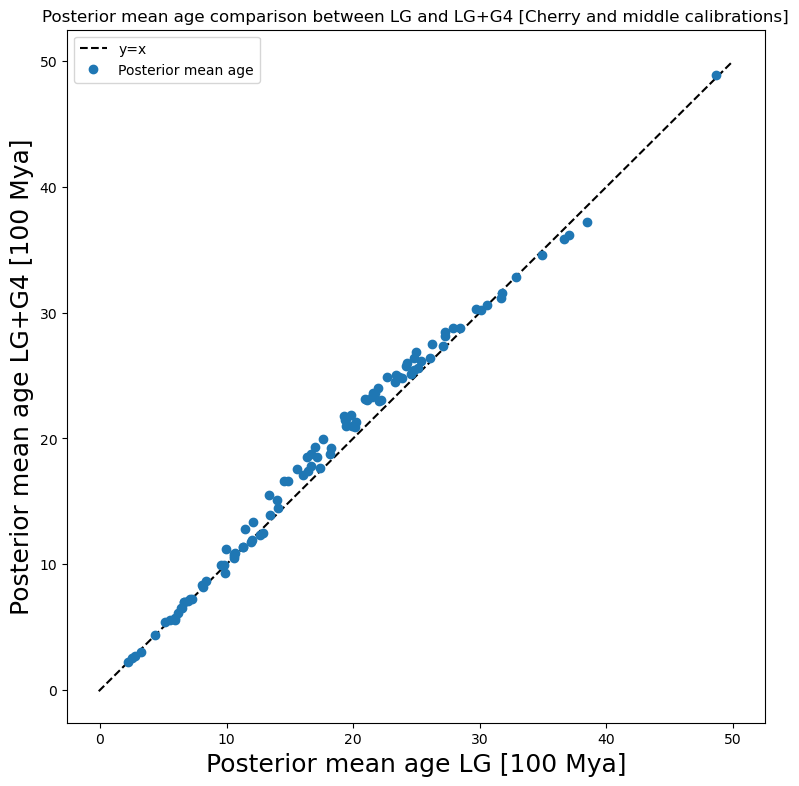

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Cherry and middle calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_cm_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_co_scatter.png')